# Feel the Beat(s)
<div align="right"><a href="https://people.epfl.ch/paolo.prandoni">Paolo Prandoni</a>, <a href="https://www.epfl.ch/labs/lcav/">LCAV, EPFL</a></div>
<br />

This simple notebook lets you interactively explore the intermodulation effects of two superimposed sinusoids.

## 1. Introduction

_Modulation_ is a technique used in telecommunication system in order to shift the spectral occupancy of a signal and adapt it to the transmission medium. In AM radio, for instance, a voice signal $s(t)$ whose maximum frequency content is below 10KHz, is modulated into the MHz range for wireless transmission:

$$
    x(t) = s(t)\cos(2\pi f_0 t);
$$

at the receiver, the $x(t)$ is demodulated to recover $s(t)$. The modulated sinusoid is usually called the _carrier_ while $s(t)$ is the modulating signal.


Consider now the well-known trigonometric formula:

$$
    \cos a + \cos b = 2\cos\left(\frac{a + b}{2}\right)\cos\left(\frac{a-b}{2}\right);
$$

using two sinusoidal signals, we have

$$
    \cos(\omega_a n) + \cos(\omega_b n) = 2\cos\left(\omega_0 n\right)\cos\left(\omega_c n\right)
$$

with $\omega_0 = (\omega_a - \omega_b)/2$ and $\omega_c = (\omega_a + \omega_b)/2$. While the left-hand side describes the sum of two cosines, which is what we obtain if we play two sinusoids together, the right-hand side describes the same signal as a product, that is, as a modulation. 

If the frequencies are very close to each other, $\omega_a \approx \omega_b$, then their average will be approximately equal to either of them, that is, $\omega_c m\approx \omega_a \approx \omega_b$ while their difference will be very small, that is, the modulating signal at frequency $\omega_0$ will have a very low frequency.

When these sinusoids are mapped to real-world frequencies in the audible range, the perceived effect will be that of a single sinusoid whose volume fluctuates in time at a rate inversely proportional to $\omega_0$. Acoustically, this volume fluctuation is called a frequency _beat_.

### 1.1 Tuning an instrument

Interestingly, frequency beats are useful to tune a stringed instrument when a reference tone (such as that of a tuning fork) is available. The idea is to play the reference note and the string at the same time. If the string is playing a frequency in the vicinity of the reference, the composite sound will be perceived as a modulated sinusoid. The number of volume fluctuations per second provide an estimate of the difference in frequency between the two notes.

## 2. Let's play

This simple fuction generates, plots and plays two sinusoids at the given frequencies:

In [1]:
# standard bookkeeping
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio, display

# interactivity library:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
plt.rcParams["figure.figsize"] = (14,4)

In [3]:
def beat_freq(f1=220.0, f2=224.0):
    # the clock of the system
    LEN = 4 # seconds
    Fs = 8000.0
    n = np.arange(0, int(LEN * Fs))
    s = np.cos(2*np.pi * f1/Fs * n) + np.cos(2*np.pi * f2/Fs * n)
    # start from the first null of the beating frequency
    if f2 != f1:
        K = int(Fs / (2 * abs(f2-f1)))
        s = s[K:]
    # play the sound
    display(Audio(data=s, rate=Fs))
    # display one second of audio
    plt.plot(s[0:int(Fs)])

The interactivity module in the notebooks allows us to easily change one of the frequencies and observe the results

interactive(children=(FloatSlider(value=220.0, description='f1', max=300.0, min=200.0), FloatSlider(value=224.…

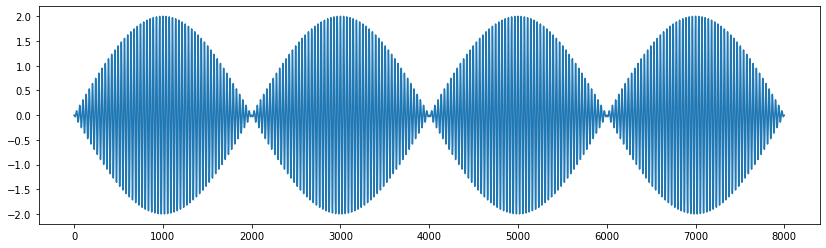

In [4]:
interact(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0));

# ---------------------------------




### Did you like this Notebook?
Yes, no, maybe? Why don't you give us some feedback using the completely anonymous form below? Thank you!

In [5]:
from IPython.display import IFrame
IFrame('https://www.surveymonkey.com/r/NOTOSURVEY?notebook_set=COM303&notebook_id=FrequencyBeatings', 600, 800)